<a href="https://colab.research.google.com/github/tennille-bernard/Kal-Academy-Assignments/blob/main/Assignment_7_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**: https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset  
In this assignment, build a model to help recognize emotions of pets from their facial expressions, gain insights into pet emotions and personalities, create fun and creative projects with pet face images, and contribute to pet face recognition research and animal welfare. This can help pet owners understand their pets better and improve their well-being.

**Mount Google Drive & Import Packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#%cd /content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/

In [2]:
# Import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow
import os
import PIL
import seaborn as sns
import pickle
from PIL import *

from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.python.keras import *
from keras import optimizers

**Load and Understand the Data**  
Data consists of:
* Happy, Sad, Angry, Other folders (1 each)
* Master folder, consisting of test data (10 images), train data (subfolders with copies of all the Happy, Sad, Angry and Other folders), and a "valid" folder with a small number of animal faces subcategorized into Angry, Happy, Sad, and Other.

In [3]:
#defining the path to each emotion's dataset
pet_happy = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Happy'
pet_sad = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Sad'
pet_angry = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Angry'
#pet_other = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Other'   #originally created this folder because an "Other" folder exists. On further inspection, the photos seem to be uncategorized, which may add unnecessary complexities at this time. May review code later and add back this folder.

**Data Preprocessing**

In [4]:
#creating a function to load and preprocess images.
def load_images(path):
  images = []
  for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
      img = cv2.resize(img, (48, 48))
      images.append(img)
  return images

In [5]:
#Loading images and labels for each emotion
pet_happy_images = load_images(pet_happy)
pet_sad_images = load_images(pet_sad)
pet_angry_images = load_images(pet_angry)
#pet_other_images = load_images(pet_other)

In [6]:
#Creating labels for each emotion category
pet_happy_labels = [0] * len(pet_happy_images)
pet_sad_labels = [1] * len(pet_sad_images)
pet_angry_labels = [2] * len(pet_angry_images)
#pet_other_labels = [3] * len(pet_other_images)

X = (pet_happy_images + pet_sad_images + pet_angry_images)
y = (pet_happy_labels + pet_sad_labels + pet_angry_labels)

In [7]:
#Normalizing the images to fall within the range [0,1]
X = np.array(X)
X = X.astype('float32')/255.0

#Using One-hot encoding on the labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=4)

#As there is a "test" data folder, we will not be splitting the data into training and testing sets, but rather just identifying them.

**Building the Model**

In [8]:
from tensorflow.keras.layers import Add, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.models import Sequential

In [9]:
#creating a function for the model
def cnn_model_create(conv_filters_1=64, conv_filters_2=128, dense_units=512, dropout_rate=0.25):
    """
    Creates and compiles a CNN model with customizable hyperparameters.

    Args:
        conv_filters_1 (int, optional): Number of filters in the first convolutional layer. Defaults to 64.
        conv_filters_2 (int, optional): Number of filters in the second convolutional layer. Defaults to 128.
        dense_units (int, optional): Number of units in the dense layer. Defaults to 512.
        dropout_rate (float, optional): Dropout rate. Defaults to 0.25.

    Returns:
        keras.Model: Compiled CNN model.
    """
    model = Sequential([
        #Initialization & Convolution Layers
        Conv2D(conv_filters_1, (3, 3), activation='relu', input_shape=(48, 48, 3)),
        BatchNormalization(),
        Dropout(dropout_rate),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(conv_filters_2, (3, 3), activation='relu'),
        Dropout(dropout_rate),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(conv_filters_2*2, (3, 3), activation='relu'),
        Dropout(dropout_rate),
        # Fully Connected Layers
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')])
    model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
    model._estimator_type = "classifier"
    return model

In [10]:
model = Sequential([
    #Initialization & Convolution Layers
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    Dropout(0.25),
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
model._estimator_type = "classifier"

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,762,244 (33.43 MB)

 Trainable params: 8,762,116 (33.42 MB)

 Non-trainable params: 128 (512.00 B)

None


In [ ]:
'''#Initialization layer
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation = 'relu')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Hidden layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
'''


**Data Augmentation**

In [13]:
datagen = ImageDataGenerator(
    rotation_range=10,  #covers rotations up to 10 deg
    width_shift_range=0.1,  #covers images shifted horizontally by up to 10%
    height_shift_range=0.1,  #covers images shifted vertically by up to 10%
    shear_range=0.2,  #covers images that may be sheared (slanted and stretched)
    zoom_range=0.2,  #covers images zoomed in by up to 20%
    horizontal_flip=True,  #covers images flipped horizontally
    fill_mode = 'nearest'  #fills in missing pixels
    )

datagen.fit(X)

**Training the model**

In [14]:
#defining the path to each emotion's dataset
pet_test_happy = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Master Folder/test/happy'
pet_test_sad = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Master Folder/test/Sad'
pet_test_angry = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Master Folder/test/Angry'

In [15]:
#Loading images and labels for each emotion
pet_test_happy_images = load_images(pet_test_happy)
pet_test_sad_images = load_images(pet_test_sad)
pet_test_angry_images = load_images(pet_test_angry)

In [16]:
#Creating labels for each emotion category
pet_test_happy_labels = [0] * len(pet_test_happy_images)
pet_test_sad_labels = [1] * len(pet_test_sad_images)
pet_test_angry_labels = [2] * len(pet_test_angry_images)
#pet_other_labels = [3] * len(pet_other_images)

X_test = (pet_test_happy_images + pet_test_sad_images + pet_test_angry_images)
y_test = (pet_test_happy_labels + pet_test_sad_labels + pet_test_angry_labels)

In [17]:
#Normalizing the images to fall within the range [0,1]
X_test = np.array(X_test)
X_test = X_test.astype('float32')/255.0

#Using One-hot encoding on the labels
y_test = to_categorical(y_test, num_classes=4)

In [18]:
X = X.reshape(-1, 48, 48, 3)
X_test = X_test.reshape(-1, 48, 48, 3)

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #defines callbacks
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001) #reduces the learning rate when the model stops improving.

In [20]:
#Calculating class weights
total_samples = len(y)
class_weights = {}
for i in range(4):
    class_samples = np.sum(y[:, i])
    class_weight = total_samples / (4 * class_samples)
    class_weights[i] = class_weight

<ipython-input-20-48b0dda2d9fe>:6: RuntimeWarning: divide by zero encountered in scalar divide
  class_weight = total_samples / (4 * class_samples)


In [21]:
# Training the model with augmented data
history_2 = model.fit(datagen.flow(X, y, batch_size=32), epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 353ms/step - accuracy: 0.3428 - loss: 2.9604 - val_accuracy: 0.3438 - val_loss: 1.3449 - learning_rate: 0.0010
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4258 - loss: 1.1039 - val_accuracy: 0.3438 - val_loss: 1.2505 - learning_rate: 0.0010
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4111 - loss: 1.0929 - val_accuracy: 0.3125 - val_loss: 1.2576 - learning_rate: 0.0010
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4866 - loss: 1.0242 - val_accuracy: 0.3750 - val_loss: 1.2744 - learning_rate: 0.0010
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4483 - loss: 1.0314 - val_accuracy: 0.3750 - val_loss: 1.2082 - learning_rate: 2.0000e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4727 - loss: 1.0031 - val_accuracy: 0.4062 - val_loss: 1.2048 - learning_rate: 2.0000e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4481 - loss: 1.0461 - va

In [ ]:
#Training the model with augmented data
#history_2 = model.fit(datagen.flow(X, y, batch_size=32), epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_learning_rate])

In [23]:
#saving the trained model
model.save("pet_faces_trained_model.keras")

In [24]:
#creating a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)  #verbose = 0 will supress output during function execution
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

In [25]:
def plot_training_curves(history):
   # Plots training and validation loss/accuracy curves.
   # Inputs/Arguments:
   #      history: a "history" object returned by model.fit().
   # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [26]:
evaluate_model(model, X_test, y_test)

Test Accuracy: 43.75%
Test Loss: 1.0931


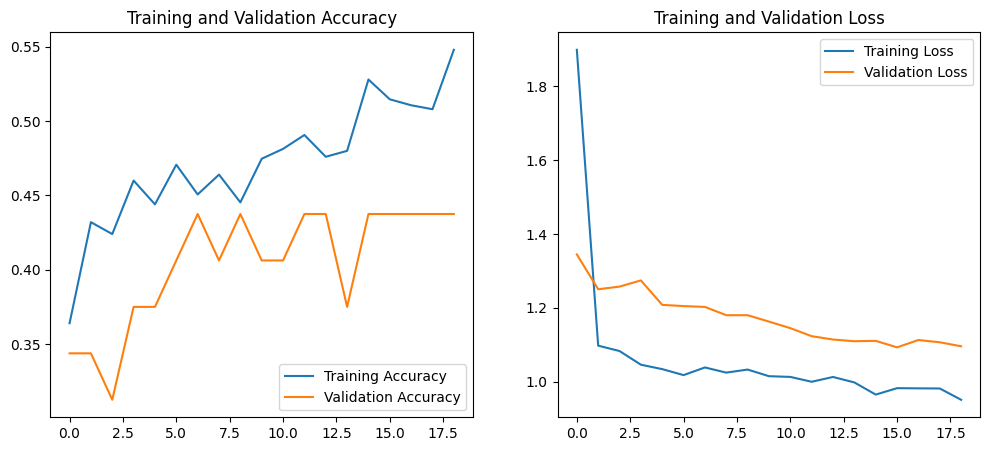

In [27]:
plot_training_curves(history_2)

Comment: The results are *not great*. Perhaps we can finetune the model?

In [33]:
#!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

In [34]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [35]:
cnn_model = KerasClassifier(build_fn=cnn_model_create, epochs=10, batch_size=64, verbose=1)

In [36]:
#Define the hyperparameter space to search
parameter_grid = {
     'conv_filters_1': [32, 64, 128],
     'conv_filters_2': [64, 128, 256],
     'dense_units': [256, 512, 1024],
     'dropout_rate': [0.25, 0.5, 0.75]}

In [37]:
best_accuracy = 0.0
best_params = {}

for conv_filters_1 in parameter_grid['conv_filters_1']:
    for conv_filters_2 in parameter_grid['conv_filters_2']:
        for dense_units in parameter_grid['dense_units']:
            for dropout_rate in parameter_grid['dropout_rate']:
                # Create and train the model with the current hyperparameters
                model = cnn_model_create(conv_filters_1, conv_filters_2, dense_units, dropout_rate)
                history = model.fit(datagen.flow(X, y, batch_size=32), epochs=10, validation_data=(X_test, y_test),
                                    callbacks=[early_stopping, reduce_learning_rate], verbose=0)  # verbose=0 for less output

                # Evaluate the model
                _, accuracy = model.evaluate(X_test, y_test, verbose=0)

                # Update best parameters if accuracy is improved
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'conv_filters_1': conv_filters_1, 'conv_filters_2': conv_filters_2,
                                   'dense_units': dense_units, 'dropout_rate': dropout_rate}

print("Best Parameters:", best_params)
print(f"Best Accuracy: {best_accuracy*100:.2f}%")

Best Parameters: {'conv_filters_1': 128, 'conv_filters_2': 64, 'dense_units': 1024, 'dropout_rate': 0.25}
Best Accuracy: 62.50%


In [ ]:
#Updating the code with new parameters

**Updating functions and model**

In [38]:
#creating a function for the model
def cnn_model_create(conv_filters_1=128, conv_filters_2=64, dense_units=1024, dropout_rate=0.25):
    """
    Creates and compiles a CNN model with customizable hyperparameters.

    Args:
        conv_filters_1 (int, optional): Number of filters in the first convolutional layer. Defaults to 64.
        conv_filters_2 (int, optional): Number of filters in the second convolutional layer. Defaults to 128.
        dense_units (int, optional): Number of units in the dense layer. Defaults to 512.
        dropout_rate (float, optional): Dropout rate. Defaults to 0.25.

    Returns:
        keras.Model: Compiled CNN model.
    """
    model = Sequential([
        #Initialization & Convolution Layers
        Conv2D(conv_filters_1, (3, 3), activation='relu', input_shape=(48, 48, 3)),
        BatchNormalization(),
        Dropout(dropout_rate),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(conv_filters_2, (3, 3), activation='relu'),
        Dropout(dropout_rate),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(conv_filters_2*2, (3, 3), activation='relu'),
        Dropout(dropout_rate),
        # Fully Connected Layers
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='softmax')])
    model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
    model._estimator_type = "classifier"
    return model

**Testing a Pet's Image**  
Grabbing random files from the Master Folder/valid filepath. One for Angry, happy and Sad each.

In [39]:
from keras.models import load_model
prediction = load_model('pet_faces_trained_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [40]:
#Load one file from each folder
pet_happy_validate_path = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Master Folder/valid/happy/010.jpg'
pet_sad_validate_path = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Master Folder/valid/Sad/015.jpg'
pet_angry_validate_path = '/content/drive/MyDrive/AI_Deep_Stack_Bootcamp_Data/Assignment_7/Master Folder/valid/Angry/07.jpg'

In [41]:
for path in [pet_happy_validate_path, pet_sad_validate_path, pet_angry_validate_path]:
  img = cv2.imread(path)
  img = cv2.resize(img, (48, 48))
  img = np.array(img)
  img = img.astype('float32')/255.0
  img = img.reshape(-1, 48, 48, 3)
  pet_prediction = prediction.predict(img)
  pet_prediction_prob = pet_prediction[0]
  pet_prediction_emotion = np.argmax(pet_prediction_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [42]:
#setting up a dictionary for potential predicted emotions
emotion_type = {0: 'Happy', 1: 'Sad', 2: 'Angry'}
predicted_emotion_readout = emotion_type[pet_prediction_emotion]

print(f"The predicted emotion is: {predicted_emotion_readout}")
print(f"The predicted emotion probability is: {pet_prediction_prob[pet_prediction_emotion]}")

The predicted emotion is: Angry
The predicted emotion probability is: 0.48021969199180603


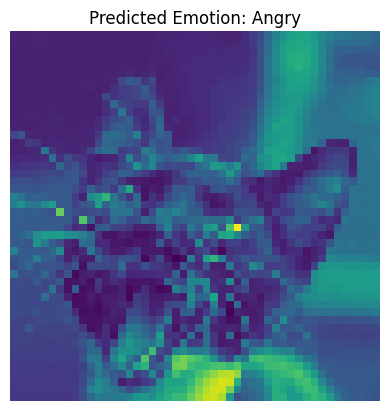

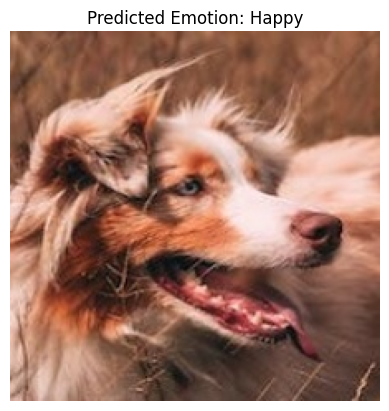

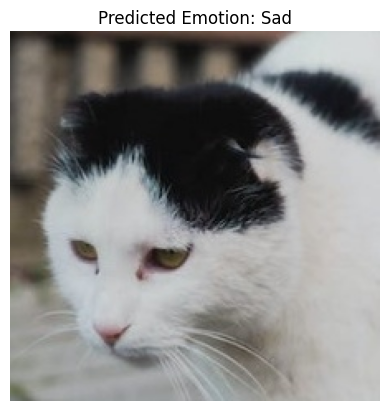

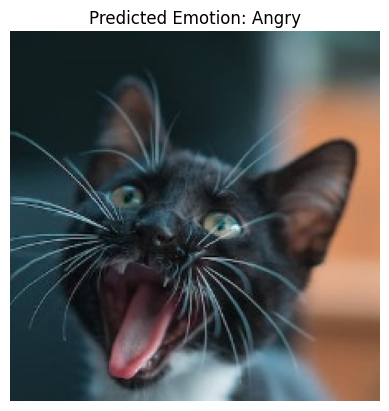

In [43]:
#Displaying the validation images using matplotlib
plt.imshow(img[0,:,:,0])
plt.title(f'''Predicted Emotion: {predicted_emotion_readout}''')
plt.axis('off')
plt.show()

from PIL import Image #displays the original validation image using PIL
img_PIL_happy = Image.open(pet_happy_validate_path)
plt.imshow(np.array(img_PIL_happy))
plt.title(f'''Predicted Emotion: Happy''')
plt.axis('off')
plt.show()

img_PIL_sad = Image.open(pet_sad_validate_path)
plt.imshow(np.array(img_PIL_sad))
plt.title(f'''Predicted Emotion: Sad''')
plt.axis('off')
plt.show()

img_PIL_angry = Image.open(pet_angry_validate_path)
plt.imshow(np.array(img_PIL_angry))
plt.title(f'''Predicted Emotion: Angry''')
plt.axis('off')
plt.show()